# Filter anordnare och statistik om dem

In [56]:
# read in resultat ansökningar 2024 csv
import pandas as pd



df_resultat_ansonkningar = pd.read_excel(
    "../../data/2024_kurser/resultat-2024-for-kurser-inom-yh.xlsx",
    sheet_name="Beviljade ansökningar",
)


df_resultat_ansonkningar.head(10)

,Diarienummer,Beslut,Anordnare namn,Utbildningsnamn,Utbildningsområde,Antal beviljade platser start 2024,Antal beviljade platser start och slut 2024,Antal beviljade platser start 2025,Totalt antal beviljade platser,YH-poäng,Kommun,Län,FA-region,Antal kommuner,Antal län,Antal FA-regioner
0,MYH 2024/1009,Beviljad,Plushögskolan AB - Affärshögskolan,Strategisk hållbarhetsutveckling,"Ekonomi, administration och försäljning",50,0,50,100,45,"Se ""Lista flera kommuner""","Se ""Lista flera kommuner""","Se ""Lista flera kommuner""",4,4,4
1,MYH 2024/1010,Beviljad,IHM Business School AB Göteborg,Social media marketing,"Ekonomi, administration och försäljning",50,0,50,100,40,Göteborg,Västra Götaland,Göteborg,1,1,1
2,MYH 2024/1016,Beviljad,Plushögskolan AB - Vårdyrkeshögskolan,"E-hälsa, digitalisering och välfärdsteknik ino...",Hälso- och sjukvård samt socialt arbete,0,50,0,50,50,"Se ""Lista flera kommuner""","Se ""Lista flera kommuner""","Se ""Lista flera kommuner""",5,4,5
3,MYH 2024/1017,Beviljad,Hyper Island Program AB - Karlskrona,Sustainability Change Leadership,"Ekonomi, administration och försäljning",55,0,55,110,55,"Se ""Lista flera kommuner""","Se ""Lista flera kommuner""","Se ""Lista flera kommuner""",2,2,2
4,MYH 2024/1018,Beviljad,Plushögskolan AB - Affärshögskolan,Digitalisering och systemkunskap inom lön - Sp...,"Ekonomi, administration och försäljning",50,0,50,100,30,Gävle,Gävleborg,Gävle,1,1,1
5,MYH 2024/1019,Beviljad,Plushögskolan AB - Vårdyrkeshögskolan,Psykisk hälsa och suicidprevention,Hälso- och sjukvård samt socialt arbete,0,50,0,50,30,"Se ""Lista flera kommuner""","Se ""Lista flera kommuner""","Se ""Lista flera kommuner""",5,5,5
6,MYH 2024/1020,Beviljad,Plushögskolan AB - Vårdyrkeshögskolan,Psykisk ohälsa hos äldre,Hälso- och sjukvård samt socialt arbete,50,0,50,100,60,"Se ""Lista flera kommuner""","Se ""Lista flera kommuner""","Se ""Lista flera kommuner""",5,5,5
7,MYH 2024/1022,Beviljad,Nackademin AB,BIM verktyg: Punktmolnsmodellering och Virtual...,Samhällsbyggnad och byggteknik,32,0,32,64,20,Solna,Stockholm,Stockholm,1,1,1
8,MYH 2024/1023,Beviljad,Plushögskolan AB - Vårdyrkeshögskolan,Funktionsnedsättningar och samsjuklighet,Hälso- och sjukvård samt socialt arbete,0,70,0,70,30,"Se ""Lista flera kommuner""","Se ""Lista flera kommuner""","Se ""Lista flera kommuner""",4,4,4
9,MYH 2024/1024,Beviljad,Plushögskolan AB - Vårdyrkeshögskolan,Missbruk och beroende,Hälso- och sjukvård samt socialt arbete,50,0,50,100,30,"Se ""Lista flera kommuner""","Se ""Lista flera kommuner""","Se ""Lista flera kommuner""",5,5,5


In [57]:
# read in inkomna ansökningar 2024

df_inkomna_ansökningar = pd.read_excel(
    "../../data/2024_kurser/inkomna-ansokningar-2024-for-kurser.xlsx",
    sheet_name="Lista ansökningar",
)

df_inkomna_ansökningar.head()

,Diarienummer,Anordnare namn,Utbildningsnamn,Sökt utbildningsområde,Sökt antal platser 2024,Sökt antal platser 2024 (start och avslut 2024),Sökt antal platser 2025,YH-poäng,Kommun,Län,FA-region,Antal kommuner,Antal län,Antal FA-regioner
0,MYH 2024/1000,Changemaker Educations AB,Futuregames Accessible Game Production,Data/IT,35,0,35,25,"Se ""Lista flera kommuner""","Se ""Lista flera kommuner""","Se ""Lista flera kommuner""",3,3,3
1,MYH 2024/1001,Changemaker Educations AB,Futuregames Inclusive Game Development,Data/IT,35,0,35,25,"Se ""Lista flera kommuner""","Se ""Lista flera kommuner""","Se ""Lista flera kommuner""",3,3,3
2,MYH 2024/1002,Båstads kommun Akademi Båstad,Ekosystemtjänster i praktiken,"Lantbruk, djurvård, trädgård, skog och fiske",25,0,0,50,Båstad,Skåne,Malmö-Lund,1,1,1
3,MYH 2024/1003,Båstads kommun Akademi Båstad,Hållbar dagvattenhantering i praktiken,"Lantbruk, djurvård, trädgård, skog och fiske",25,0,0,50,Båstad,Skåne,Malmö-Lund,1,1,1
4,MYH 2024/1004,Båstads kommun Akademi Båstad,Invasiva växter i utemiljöer,"Lantbruk, djurvård, trädgård, skog och fiske",40,40,0,25,Båstad,Skåne,Malmö-Lund,1,1,1


In [58]:
df_resultat_ansonkningar["Anordnare namn"].unique().shape

(111,)

In [59]:
df_beviljade_2024 = df_resultat_ansonkningar[
    ["Anordnare namn", "Antal beviljade platser start 2024"]
].groupby("Anordnare namn")["Antal beviljade platser start 2024"].sum().to_frame().rename(columns={"Antal beviljade platser start 2024": "Total beviljade platser 2024"})

In [60]:
df_beviljade_2024.sort_values(by="Total beviljade platser 2024", ascending=False)

,Total beviljade platser 2024
Anordnare namn,
IHM Business School AB Göteborg,860
Medieinstitutet i Sverige AB,457
YH Akademin AB,435
Nackademin AB,336
TUC Sweden AB - Yrkeshögskola,285
...,...
Sveriges Yrkeshögskola AB - Göteborg Yrkeshögskola,0
Västerås Stad/Barn- och Utbildningsförvaltningen/Västerås Yrkeshögskola,0
YH Akademin(Marknad),0


In [61]:
df_beviljade_start_avslut_2024 = df_resultat_ansonkningar[
    ["Anordnare namn", "Antal beviljade platser start och slut 2024"]
].groupby("Anordnare namn")["Antal beviljade platser start och slut 2024"].sum().to_frame().rename(columns={"Antal beviljade platser start och slut 2024": "Total beviljade platser start och slut 2024"})

In [62]:
df_beviljade_start_avslut_2024.sort_values(by= "Total beviljade platser start och slut 2024", ascending=False)

,Total beviljade platser start och slut 2024
Anordnare namn,
YH Akademin AB,660
Medieinstitutet i Sverige AB,415
IHM Business School AB Göteborg,400
Nackademin AB,335
"Göteborgs Stad, Yrgo",289
...,...
Plushögskolan AB - Teknikhögskolan,0
Stiftelsen Capellagården,0
Tekniska Högskolan i Jönköping AB,0


In [63]:
df_beviljade_2025 = df_resultat_ansonkningar[
    ["Anordnare namn", "Antal beviljade platser start 2025"]
].groupby("Anordnare namn")["Antal beviljade platser start 2025"].sum().to_frame().rename(columns={"Antal beviljade platser start 2025": "Total beviljade platser 2025"})

df_beviljade_2025.sort_values(by="Total beviljade platser 2025", ascending=False)


,Total beviljade platser 2025
Anordnare namn,
IHM Business School AB Göteborg,860
Medieinstitutet i Sverige AB,457
YH Akademin AB,435
Nackademin AB,336
Stiftelsen Stockholms Tekniska Institut,265
...,...
Technigo AB,0
Tekniska Högskolan i Jönköping AB,0
YH Akademin(Marknad),0


In [64]:
df_alla_beviljade = pd.concat([df_beviljade_2024, df_beviljade_start_avslut_2024, df_beviljade_2025], axis= 1)

df_alla_beviljade.info()

<class 'pandas.core.frame.DataFrame'>
Index: 111 entries, ABF Göteborg Vuxenutbildning AB to Östsvenska Yrkeshögskolan AB
Data columns (total 3 columns):
 #   Column                                       Non-Null Count  Dtype
---  ------                                       --------------  -----
 0   Total beviljade platser 2024                 111 non-null    int64
 1   Total beviljade platser start och slut 2024  111 non-null    int64
 2   Total beviljade platser 2025                 111 non-null    int64
dtypes: int64(3)
memory usage: 3.5+ KB


In [65]:
df_alla_beviljade["Total"] = df_alla_beviljade.sum(axis=1)
df_alla_beviljade = df_alla_beviljade.sort_values(by= "Total", ascending= False)

In [66]:
df_alla_beviljade["Avslutar_2025"] = (df_alla_beviljade["Total beviljade platser 2024"] - df_alla_beviljade["Total beviljade platser start och slut 2024"])

In [67]:
df_alla_beviljade = df_alla_beviljade.sort_values(by= "Avslutar_2025", ascending= False)

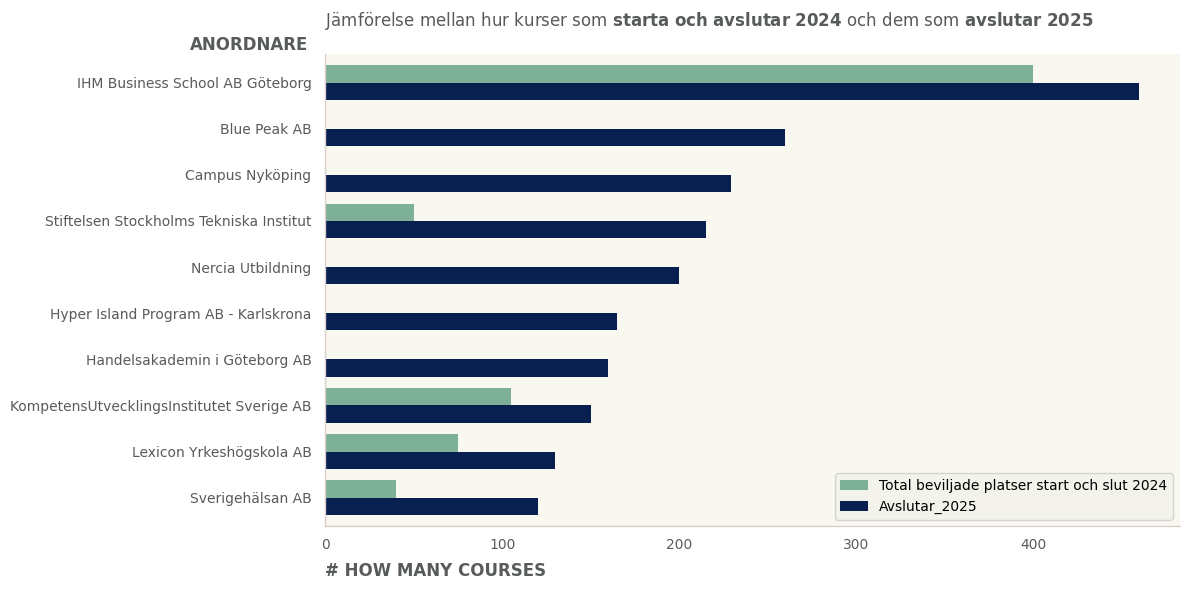

In [68]:
import matplotlib.pyplot as plt
import numpy as np
plt.style.use("marcus.mplstyle")

colors = ["#7DAF99", "#072050"]



def horizontal_bar(ax, **option):

    ax.invert_yaxis()

    # clutter
    ax.tick_params("y", length=0, pad=10)
    

    # Describle title and label -> call to action
    ax.set_title(
        option.get("title", ""),
        loc="left",
        pad=option.get("pad", 15),
    )
    # contrast
    ax.set_ylabel(option.get("y_title", ""), loc="top", rotation=0, fontsize=option.get("y_font", 12))
    ax.yaxis.set_label_coords(option.get("ylabel_xcoords", 0), option.get("ylabel_ycoords", 0))
    ax.set_xlabel(option.get("x_title", ""), loc="left", fontsize=option.get("x_font", 12))
    ax.set_facecolor(option.get("facecolor", "#F8F8F0"))
    
    # ax.legend().remove()
    return ax


# creating fig and insert data to ax
fig, ax = plt.subplots(figsize=(12, 6))

ax = df_alla_beviljade.drop(
    ["Total", "Total beviljade platser 2025", "Total beviljade platser 2024"], axis=1
)[:10].plot(kind="barh", ax=ax, color=colors, width=0.75)


ax = horizontal_bar(
    ax,
    title=r"Jämförelse mellan hur kurser som $\mathbf{starta\ och\ avslutar\ 2024}$ och dem som $\mathbf{avslutar\ 2025}$",
    pad= 20,
    y_title = "ANORDNARE",
    x_title= "# HOW MANY COURSES",
    ylabel_xcoords= -0.02,
    ylabel_ycoords= 1,
)


def save_fig_from_ax(ax, fig_path, **option):
    
    fig = ax.get_figure()
    fig.tight_layout()
    fig.savefig(fig_path, dpi= option.get("dpi", 300))

save_fig_from_ax(ax, "../figures/anordnare_kurser_start_avslut_2024.png")


## Data cleaning and filtered resultat kurser för anordnare 

In [69]:

# Kurser beviljade 2020 juli är en tilläg
# Kurser beviljade 2020 april
df_resultat_2020_april = pd.read_excel(
    "../../data/anordnare_resultat_kurser_2020-2024/Beviljade-korta-utb-kurser-kurspaket-YH-april-2020-1.xlsx"
)

# Kurser beviljade 2020 juli
df_resultat_2020_juli = pd.read_excel("../../data/anordnare_resultat_kurser_2020-2024/Beviljade-korta-utb-kurser-kurspaket-YH-juli-2020-2.xlsx")

# kurser resultat 2021
df_resultat_2021 = pd.read_excel("../../data/anordnare_resultat_kurser_2020-2024/resultat-juni-2021-for-korta-utbildningar-kurser-och-kurspaket.xlsx")


# kurser resultat 2022
df_resultat_2022 = pd.read_excel("../../data/anordnare_resultat_kurser_2020-2024/resultat-2022-for-kurser-inom-yh.xlsx")



# kurser resultat 2023
df_resultat_2023 = pd.read_excel("../../data/anordnare_resultat_kurser_2020-2024/resultat-2023-for-kurser-inom-yh.xlsx")
df_resultat_2023_utökat = pd.read_excel("../../data/anordnare_resultat_kurser_2020-2024/beviljade-kurser-inom-yrkeshogskolan-med-utokat-yh-anslag-2023.xlsx") 

# kurser resultat 2024
df_resultat_2024 = pd.read_excel("../../data/anordnare_resultat_kurser_2020-2024/resultat-2024-for-kurser-inom-yh.xlsx", sheet_name= "Beviljade ansökningar")



In [70]:
df_resultat_2020_april

,Utbildningsområde,Utbildningsnamn,YH-poäng,Anordnare,Kommun 1,Kommun 2,Kommun 3,Kommun 4,Kommun 5,Kommun 6,Platser med start 2020,Platser med start 2021,Utbildningsnummer
0,Data/IT,Agil testautomatiserare,60,IT-Högskolan Sverige AB,Göteborg,NaN,NaN,NaN,NaN,NaN,15,20,YH01239
1,Data/IT,Agila arbetsmetoder &DevOps för utveklare,40,Lernia Utbildning AB,Malmö,NaN,NaN,NaN,NaN,NaN,6,6,YH01249
2,Data/IT,Agile Project Leader,60,Changemaker Educations AB,Stockholm,Boden,Skellefteå,Karlstad,NaN,NaN,30,60,YH01247
3,Data/IT,Agilt ledarskap,20,Nackademin AB,Solna,NaN,NaN,NaN,NaN,NaN,30,30,YH01242
4,Data/IT,Amazon AWS,60,Campus Mölndal,Mölndal,NaN,NaN,NaN,NaN,NaN,25,50,YH01241
...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,Teknik och tillverkning,Produktionsprocesser och beredning,30,Köpings kommun,Köping,NaN,NaN,NaN,NaN,NaN,0,20,YH01320
97,Teknik och tillverkning,Torkare på pappers- och kartongmaskiner,30,Creando Training AB – Creando School,Sundsvall,NaN,NaN,NaN,NaN,NaN,30,30,YH01333
98,Teknik och tillverkning,VHDL-programmerare,75,AGSTU AB,Virsbo,Västerås,NaN,NaN,NaN,NaN,10,20,YH01311
99,Teknik och tillverkning,"Yrkesanpassad Driftingenjör inom Kyla, VVS och...",95,Karlsson Climate AB,Eslöv,NaN,NaN,NaN,NaN,NaN,20,25,YH01317


In [71]:

kommun_cols = ["Kommun 1", "Kommun 2", "Kommun 3", "Kommun 4", "Kommun 5", "Kommun 6"]


df_resultat_2020_april["Kommun"] = (
    df_resultat_2020_april[kommun_cols].fillna("")
    .apply(lambda row: ", ".join([k for k in row if k.strip() != ""]), axis= 1)
)
   


df_resultat_2020_april = df_resultat_2020_april.drop(
    kommun_cols, axis=1).rename(columns={"Utbildningsnummer": "Diarienummer", "Anordnare": "Anordnare namn"})




In [72]:
df_resultat_2020_april.columns

Index(['Utbildningsområde', 'Utbildningsnamn', 'YH-poäng', 'Anordnare namn',
       'Platser med start 2020', 'Platser med start 2021', 'Diarienummer',
       'Kommun'],
      dtype='object')

In [73]:
rename_column = [
    "Diarienummer",
    "Anordnare namn",
    "Utbildningsnamn",
    "Utbildningsområde",
    "Platser med start 2020",
    "Platser med start 2021",
    "YH-poäng",
    "Kommun"
]

df_resultat_2020_april = df_resultat_2020_april[rename_column]
df_resultat_2020_april

,Diarienummer,Anordnare namn,Utbildningsnamn,Utbildningsområde,Platser med start 2020,Platser med start 2021,YH-poäng,Kommun
0,YH01239,IT-Högskolan Sverige AB,Agil testautomatiserare,Data/IT,15,20,60,Göteborg
1,YH01249,Lernia Utbildning AB,Agila arbetsmetoder &DevOps för utveklare,Data/IT,6,6,40,Malmö
2,YH01247,Changemaker Educations AB,Agile Project Leader,Data/IT,30,60,60,"Stockholm, Boden, Skellefteå, Karlstad"
3,YH01242,Nackademin AB,Agilt ledarskap,Data/IT,30,30,20,Solna
4,YH01241,Campus Mölndal,Amazon AWS,Data/IT,25,50,60,Mölndal
...,...,...,...,...,...,...,...,...
96,YH01320,Köpings kommun,Produktionsprocesser och beredning,Teknik och tillverkning,0,20,30,Köping
97,YH01333,Creando Training AB – Creando School,Torkare på pappers- och kartongmaskiner,Teknik och tillverkning,30,30,30,Sundsvall
98,YH01311,AGSTU AB,VHDL-programmerare,Teknik och tillverkning,10,20,75,"Virsbo , Västerås"
99,YH01317,Karlsson Climate AB,"Yrkesanpassad Driftingenjör inom Kyla, VVS och...",Teknik och tillverkning,20,25,95,Eslöv


In [74]:

df_resultat_2020_april

,Diarienummer,Anordnare namn,Utbildningsnamn,Utbildningsområde,Platser med start 2020,Platser med start 2021,YH-poäng,Kommun
0,YH01239,IT-Högskolan Sverige AB,Agil testautomatiserare,Data/IT,15,20,60,Göteborg
1,YH01249,Lernia Utbildning AB,Agila arbetsmetoder &DevOps för utveklare,Data/IT,6,6,40,Malmö
2,YH01247,Changemaker Educations AB,Agile Project Leader,Data/IT,30,60,60,"Stockholm, Boden, Skellefteå, Karlstad"
3,YH01242,Nackademin AB,Agilt ledarskap,Data/IT,30,30,20,Solna
4,YH01241,Campus Mölndal,Amazon AWS,Data/IT,25,50,60,Mölndal
...,...,...,...,...,...,...,...,...
96,YH01320,Köpings kommun,Produktionsprocesser och beredning,Teknik och tillverkning,0,20,30,Köping
97,YH01333,Creando Training AB – Creando School,Torkare på pappers- och kartongmaskiner,Teknik och tillverkning,30,30,30,Sundsvall
98,YH01311,AGSTU AB,VHDL-programmerare,Teknik och tillverkning,10,20,75,"Virsbo , Västerås"
99,YH01317,Karlsson Climate AB,"Yrkesanpassad Driftingenjör inom Kyla, VVS och...",Teknik och tillverkning,20,25,95,Eslöv


In [75]:


df_resultat_2020_juli

,Utbildningsområde,Utbildningsnamn,YH-poäng,Anordnare,Kommun 1,Kommun 2,Kommun 3,Kommun 4,Kommun 5,Kommun 6,Kommun 7,Kommun 8,Kommun 9,Kommun 10,Platser med start och avslut 2020,Utbildningsnummer
0,Data/IT,Affärsinriktad IT-Servicemanager med kompetens...,50,Folkuniversitetet - Stiftelsen Kursverksamhete...,Uppsala,.,.,.,.,.,NaN,NaN,NaN,NaN,25,YH01441
1,Data/IT,Agil förändringsledning,30,IHM Business School AB Malmö,Malmö,.,.,.,.,.,NaN,NaN,NaN,NaN,30,YH01383
2,Data/IT,Agila arbetsmetoder & DevOps för utvecklare,40,Lernia Utbildning AB,Malmö,.,.,.,.,.,NaN,NaN,NaN,NaN,25,YH01386
3,Data/IT,Agile Project Leader,60,Changemaker Educations AB,Stockholm,Boden,Skellefteå,Karlstad,.,.,NaN,NaN,NaN,NaN,30,YH01435
4,Data/IT,AI för effektiv digital marknadsföring,30,"Göteborgs stad, Yrgo",Göteborg,.,.,.,.,.,NaN,NaN,NaN,NaN,25,YH01381
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,Teknik och tillverkning,Produktionsteknik inriktning hållbarhet,50,Hermods AB,Göteborg,.,.,.,.,.,NaN,NaN,NaN,NaN,30,YH01359
103,Teknik och tillverkning,Råvarukunskap och förädling,25,Folkuniversitetet - Kursverksamheten vid Lunds...,Lund,.,.,.,.,.,NaN,NaN,NaN,NaN,20,YH01360
104,Teknik och tillverkning,VHDL-programmerare,75,AGSTU AB,Surahammar,.,.,.,.,.,NaN,NaN,NaN,NaN,10,YH01350
105,Transporttjänster,Logistik och E-handelslösningar,40,"Göteborgs stad, Yrgo",Göteborg,.,.,.,.,.,NaN,NaN,NaN,NaN,25,YH01417


In [76]:
kommun_cols = ["Kommun 1", "Kommun 2", "Kommun 3", "Kommun 4", "Kommun 5", "Kommun 6", "Kommun 7", "Kommun 8", "Kommun 9", "Kommun 10"]

# using filna to replace Nan value to empty string.
# apply to strip empty and dot and with .join get , between the municipality 
df_resultat_2020_juli["Kommun"] = (
    df_resultat_2020_juli[kommun_cols].fillna("")
    .apply(lambda row: ", ".join([k for k in row if k.strip() not in ["", "."]]), axis= 1)
)


df_resultat_2020_juli = df_resultat_2020_juli.drop(kommun_cols, axis= 1).rename(columns= {"Anordnare": "Anordnare namn", "Utbildningsnummer": "Diarienummer"})


In [77]:
df_resultat_2020_juli.columns

Index(['Utbildningsområde', 'Utbildningsnamn', 'YH-poäng', 'Anordnare namn',
       'Platser med start och avslut 2020', 'Diarienummer', 'Kommun'],
      dtype='object')

In [78]:
rename_column = [
    "Diarienummer",
    "Anordnare namn",
    "Utbildningsnamn",
    "Utbildningsområde",
    "Platser med start och avslut 2020",
    "YH-poäng",
    "Kommun"
]

df_resultat_2020_juli = df_resultat_2020_juli[rename_column]
df_resultat_2020_juli

,Diarienummer,Anordnare namn,Utbildningsnamn,Utbildningsområde,Platser med start och avslut 2020,YH-poäng,Kommun
0,YH01441,Folkuniversitetet - Stiftelsen Kursverksamhete...,Affärsinriktad IT-Servicemanager med kompetens...,Data/IT,25,50,Uppsala
1,YH01383,IHM Business School AB Malmö,Agil förändringsledning,Data/IT,30,30,Malmö
2,YH01386,Lernia Utbildning AB,Agila arbetsmetoder & DevOps för utvecklare,Data/IT,25,40,Malmö
3,YH01435,Changemaker Educations AB,Agile Project Leader,Data/IT,30,60,"Stockholm, Boden, Skellefteå, Karlstad"
4,YH01381,"Göteborgs stad, Yrgo",AI för effektiv digital marknadsföring,Data/IT,25,30,Göteborg
...,...,...,...,...,...,...,...
102,YH01359,Hermods AB,Produktionsteknik inriktning hållbarhet,Teknik och tillverkning,30,50,Göteborg
103,YH01360,Folkuniversitetet - Kursverksamheten vid Lunds...,Råvarukunskap och förädling,Teknik och tillverkning,20,25,Lund
104,YH01350,AGSTU AB,VHDL-programmerare,Teknik och tillverkning,10,75,Surahammar
105,YH01417,"Göteborgs stad, Yrgo",Logistik och E-handelslösningar,Transporttjänster,25,40,Göteborg


In [79]:

# Control check that course is a difference application 
df_resultat_2020_april[df_resultat_2020_april["Diarienummer"].isin(df_resultat_2020_juli["Diarienummer"])]



,Diarienummer,Anordnare namn,Utbildningsnamn,Utbildningsområde,Platser med start 2020,Platser med start 2021,YH-poäng,Kommun


In [80]:
df_resultat_2021

,Diarienummer,Anordnare namn,Utbildningsnamn,Utbildningsområde,Antal beviljade platser 2021,Antal beviljade platser 2022,Totalt antal beviljade platser,YH-poäng,Kommun,Län,FA-region,Antal kommuner,Antal län,Antal FA-regioner
0,MYH 2021/1341,YrkesAkademin YH AB,Bid Manager,"Ekonomi, administration och försäljning",35,35,70,70,"Se ""Lista flera kommuner""","Se ""Lista flera kommuner""","Se ""Lista flera kommuner""",3,3,3
1,MYH 2021/1346,KompetensUtvecklingsInstitutet Sverige AB,Palliativ vård,Hälso- och sjukvård samt socialt arbete,30,60,90,30,"Se ""Lista flera kommuner""","Se ""Lista flera kommuner""","Se ""Lista flera kommuner""",3,3,3
2,MYH 2021/1353,YrkesAkademin YH AB,Programmering och utveckling av inbyggda syste...,Data/IT,30,30,60,80,Trollhättan,Västra Götaland,Trollhättan-Vänersborg,1,1,1
3,MYH 2021/1396,YrkesAkademin YH AB,Fjärrpilot och operatör för drönare,Transporttjänster,30,60,90,80,Örnsköldsvik,Västernorrland,Örnsköldsvik,1,1,1
4,MYH 2021/1401,YrkesAkademin YH AB,Power grids - smarta elnät,Teknik och tillverkning,40,60,100,75,"Se ""Lista flera kommuner""","Se ""Lista flera kommuner""","Se ""Lista flera kommuner""",2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,MYH 2021/2132,Medieinstitutet i Sverige AB,Sökmarknadsföring SEO & SEM,"Ekonomi, administration och försäljning",40,120,160,40,Stockholm,Stockholm,Stockholm,1,1,1
105,MYH 2021/2138,John Ericsson Institutet,Energieffektivisering och driftoptimering,Samhällsbyggnad och byggteknik,0,60,60,30,Stockholm,Stockholm,Stockholm,1,1,1
106,MYH 2021/2141,John Ericsson Institutet,Fastighetsautomation,Samhällsbyggnad och byggteknik,0,60,60,20,Stockholm,Stockholm,Stockholm,1,1,1
107,MYH 2021/2155,Stockholm School of Business,Systemförvaltning för lönespecialister,"Ekonomi, administration och försäljning",30,60,90,50,Stockholm,Stockholm,Stockholm,1,1,1


In [81]:
df_resultat_2022.rename(
    columns={
        "Antal beviljade platser 2022": "Antal beviljade platser start 2022",
        "Antal beviljade platser 2023": "Antal beviljade platser start 2023",
    },
    inplace=True,
)


df_resultat_2022 = df_resultat_2022[df_resultat_2022["Beslut"] == "Beviljad"]


In [82]:
df_resultat_2022

,Diarienummer,Beslut,Anordnare namn,Utbildningsnamn,Utbildningsområde,Antal beviljade platser start 2022,Antal beviljade platser start 2023,Totalt antal beviljade platser,YH-poäng,Kommun,Län,FA-region,Antal kommuner,Antal län,Antal FA-regioner
3,MYH 2022/2396,Beviljad,KompetensUtvecklingsInstitutet Sverige AB,Palliativ vård,Hälso- och sjukvård samt socialt arbete,25,60,85,30,"Se ""Lista flera kommuner""","Se ""Lista flera kommuner""","Se ""Lista flera kommuner""",3,3,3
4,MYH 2022/2398,Beviljad,KompetensUtvecklingsInstitutet Sverige AB,"Psykisk ohälsa, suicid och suicidprevention",Hälso- och sjukvård samt socialt arbete,25,80,105,30,"Se ""Lista flera kommuner""","Se ""Lista flera kommuner""","Se ""Lista flera kommuner""",3,3,3
5,MYH 2022/2400,Beviljad,KompetensUtvecklingsInstitutet Sverige AB,Vårdhygien och vårdrelaterade infektioner,Hälso- och sjukvård samt socialt arbete,25,60,85,25,"Se ""Lista flera kommuner""","Se ""Lista flera kommuner""","Se ""Lista flera kommuner""",3,3,3
9,MYH 2022/2447,Beviljad,KompetensUtvecklingsInstitutet Sverige AB,NPF inriktning barn och unga,Pedagogik och undervisning,35,80,115,50,"Se ""Lista flera kommuner""","Se ""Lista flera kommuner""","Se ""Lista flera kommuner""",2,2,2
12,MYH 2022/2452,Beviljad,IHM Business School AB Malmö,Digitalisering och hållbarhet inom redovisning,"Ekonomi, administration och försäljning",40,80,120,30,Malmö,Skåne,Malmö-Lund,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456,MYH 2022/2985,Beviljad,IT-Högskolan Sverige AB,Agil testautomatiserare,Data/IT,20,40,60,60,Göteborg,Västra Götaland,Göteborg,1,1,1
459,MYH 2022/2988,Beviljad,Stockholm School of Business,Digital transformation för redovisningskonsulter,"Ekonomi, administration och försäljning",40,80,120,30,Malmö,Skåne,Malmö-Lund,1,1,1
467,MYH 2022/2996,Beviljad,IT-Högskolan Sverige AB,Pythonprogrammering för AI-utveckling,Data/IT,20,45,65,30,Göteborg,Västra Götaland,Göteborg,1,1,1
472,MYH 2022/3001,Beviljad,"Kartotek, Kart- och teknikutbildarna i Haninge AB",Markmodellering och kartering med drönare,Samhällsbyggnad och byggteknik,20,50,70,30,Stockholm,Stockholm,Stockholm,1,1,1


In [83]:
df_resultat_2023 = df_resultat_2023[df_resultat_2023["Beslut"] == "Beviljad"]

df_resultat_2023

,Diarienummer,Beslut,Anordnare namn,Utbildningsnamn,Utbildningsområde,Antal beviljade platser 2023,Antal beviljade platser 2024,Totalt antal beviljade platser,YH-poäng,Kommun,Län,FA-region,Antal kommuner,Antal län,Antal FA-regioner
2,MYH 2023/1080,Beviljad,Nyköpings kommun - Flygteknik technical training,El- och avioniktekniker,Teknik och tillverkning,0,15,15,99,Nyköping,Södermanland,Nyköping-Oxelösund,1,1,1
3,MYH 2023/1082,Beviljad,Handelsakademin i Göteborg AB,Cloud Development,Data/IT,40,40,80,70,Göteborg,Västra Götaland,Göteborg,1,1,1
5,MYH 2023/1091,Beviljad,KompetensUtvecklingsInstitutet Sverige AB,Vård och omsorg vid demenssjukdom/kognitiv sju...,Hälso- och sjukvård samt socialt arbete,35,40,75,35,"Se ""Lista flera kommuner""","Se ""Lista flera kommuner""","Se ""Lista flera kommuner""",3,3,3
6,MYH 2023/1093,Beviljad,KompetensUtvecklingsInstitutet Sverige AB,Vårdhygien och vårdrelaterade infektioner,Hälso- och sjukvård samt socialt arbete,20,30,50,25,"Se ""Lista flera kommuner""","Se ""Lista flera kommuner""","Se ""Lista flera kommuner""",3,3,3
7,MYH 2023/1097,Beviljad,IHM Business School AB Stockholm,Data Storytelling & Visualization,"Ekonomi, administration och försäljning",40,40,80,40,Stockholm,Stockholm,Stockholm,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274,MYH 2023/176,Beviljad,YrkesAkademin YH AB,Industriellt träbyggande,Samhällsbyggnad och byggteknik,25,25,50,40,"Se ""Lista flera kommuner""","Se ""Lista flera kommuner""","Se ""Lista flera kommuner""",2,2,2
275,MYH 2023/357,Beviljad,YrkesAkademin YH AB,Cirkulär ekonomi för restaurang-/kökschefer,"Hotell, restaurang och turism",30,50,80,25,"Se ""Lista flera kommuner""","Se ""Lista flera kommuner""","Se ""Lista flera kommuner""",2,2,2
277,MYH 2023/786,Beviljad,Hermods AB Malmö,Automatiserad lageroptimering,Teknik och tillverkning,30,30,60,50,"Se ""Lista flera kommuner""","Se ""Lista flera kommuner""","Se ""Lista flera kommuner""",2,1,1
278,MYH 2023/798,Beviljad,Hermods AB Stockholm,Cirkulärt byggande och hållbar arbetsledning,Samhällsbyggnad och byggteknik,30,30,60,60,Stockholm,Stockholm,Stockholm,1,1,1


In [84]:

# Make sure they have difference diarienummer, if they don't match they are difference appliction 
df_resultat_2023_utökat[df_resultat_2023_utökat["Diarienummer"].isin(df_resultat_2023["Diarienummer"])]

df_resultat_2023_utökat.columns

Index(['Diarienummer', 'Beslut', 'Anordnare namn', 'Utbildningsnamn',
       'Utbildningsområde', 'Antal beviljade platser 2023',
       'Antal beviljade platser 2024', 'Totalt antal beviljade platser',
       'YH-poäng', 'Kommun', 'Län', 'FA-region', 'Antal kommuner', 'Antal län',
       'Antal FA-regioner'],
      dtype='object')

In [85]:
df_resultat_2023_utökat.rename(
    columns={
        "Antal beviljade platser 2023": "Antal beviljade platser utökad-anslag 2023",
        "Antal beviljade platser 2024": "Antal beviljade platser utökad-anslag 2024",
    },
    inplace=True,
)

In [86]:

df_resultat_2023_utökat

,Diarienummer,Beslut,Anordnare namn,Utbildningsnamn,Utbildningsområde,Antal beviljade platser utökad-anslag 2023,Antal beviljade platser utökad-anslag 2024,Totalt antal beviljade platser,YH-poäng,Kommun,Län,FA-region,Antal kommuner,Antal län,Antal FA-regioner
0,MYH 2023/1062,Beviljad,YrkesAkademin YH AB,Anbud- och upphandling med hållbar kravställning,"Ekonomi, administration och försäljning",35,0,35,70,"Se ""Lista flera kommuner""","Se ""Lista flera kommuner""","Se ""Lista flera kommuner""",2,2,2
1,MYH 2023/1064,Beviljad,YrkesAkademin YH AB,Arbetsrätt för chefer och ledare,Juridik,35,0,35,30,Malmö,Skåne,Malmö-Lund,1,1,1
2,MYH 2023/1076,Beviljad,YrkesAkademin YH AB,Beskärningshandledare och trädvård,"Lantbruk, djurvård, trädgård, skog och fiske",25,0,25,30,"Se ""Lista flera kommuner""","Se ""Lista flera kommuner""","Se ""Lista flera kommuner""",2,2,2
3,MYH 2023/1092,Beviljad,IHM Business School AB Göteborg,Affärsutveckling Unified Commerce,"Ekonomi, administration och försäljning",40,0,40,60,Göteborg,Västra Götaland,Göteborg,1,1,1
4,MYH 2023/1094,Beviljad,KompetensUtvecklingsInstitutet Sverige AB,Språkutveckling inriktning barn och unga,Pedagogik och undervisning,30,0,30,45,"Se ""Lista flera kommuner""","Se ""Lista flera kommuner""","Se ""Lista flera kommuner""",2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,MYH 2023/803,Beviljad,Hermods AB Umeå,Klimatberäkningar - nybyggnation,Samhällsbyggnad och byggteknik,30,0,30,60,Umeå,Västerbotten,Umeå,1,1,1
237,MYH 2023/957,Beviljad,Plushögskolan AB - Teknikhögskolan,"KMA (Kvalite, Miljö- och Arbetsmiljö)",Samhällsbyggnad och byggteknik,40,0,40,30,"Se ""Lista flera kommuner""","Se ""Lista flera kommuner""","Se ""Lista flera kommuner""",3,3,3
238,MYH 2023/971,Beviljad,Hermods AB Stockholm,Fördjupad byggledning med inriktning mark och ...,Samhällsbyggnad och byggteknik,30,0,30,60,Stockholm,Stockholm,Stockholm,1,1,1
239,MYH 2023/972,Beviljad,Hermods AB Stockholm,Informationssäkerhet,Säkerhetstjänster,30,0,30,35,"Se ""Lista flera kommuner""","Se ""Lista flera kommuner""","Se ""Lista flera kommuner""",2,2,2


In [87]:
df_resultat_2024 = df_resultat_2024[df_resultat_2024["Beslut"] == "Beviljad"]

df_resultat_2024

,Diarienummer,Beslut,Anordnare namn,Utbildningsnamn,Utbildningsområde,Antal beviljade platser start 2024,Antal beviljade platser start och slut 2024,Antal beviljade platser start 2025,Totalt antal beviljade platser,YH-poäng,Kommun,Län,FA-region,Antal kommuner,Antal län,Antal FA-regioner
0,MYH 2024/1009,Beviljad,Plushögskolan AB - Affärshögskolan,Strategisk hållbarhetsutveckling,"Ekonomi, administration och försäljning",50,0,50,100,45,"Se ""Lista flera kommuner""","Se ""Lista flera kommuner""","Se ""Lista flera kommuner""",4,4,4
1,MYH 2024/1010,Beviljad,IHM Business School AB Göteborg,Social media marketing,"Ekonomi, administration och försäljning",50,0,50,100,40,Göteborg,Västra Götaland,Göteborg,1,1,1
2,MYH 2024/1016,Beviljad,Plushögskolan AB - Vårdyrkeshögskolan,"E-hälsa, digitalisering och välfärdsteknik ino...",Hälso- och sjukvård samt socialt arbete,0,50,0,50,50,"Se ""Lista flera kommuner""","Se ""Lista flera kommuner""","Se ""Lista flera kommuner""",5,4,5
3,MYH 2024/1017,Beviljad,Hyper Island Program AB - Karlskrona,Sustainability Change Leadership,"Ekonomi, administration och försäljning",55,0,55,110,55,"Se ""Lista flera kommuner""","Se ""Lista flera kommuner""","Se ""Lista flera kommuner""",2,2,2
4,MYH 2024/1018,Beviljad,Plushögskolan AB - Affärshögskolan,Digitalisering och systemkunskap inom lön - Sp...,"Ekonomi, administration och försäljning",50,0,50,100,30,Gävle,Gävleborg,Gävle,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
446,MYH 2024/990,Beviljad,Företagsuniversitetet AB,Upphandling av digitaliserings- och IT-lösningar,"Ekonomi, administration och försäljning",0,50,0,50,15,Stockholm,Stockholm,Stockholm,1,1,1
447,MYH 2024/993,Beviljad,INSU AB,Solenergiprojektering,Samhällsbyggnad och byggteknik,0,0,50,50,95,Nyköping,Södermanland,Nyköping-Oxelösund,1,1,1
448,MYH 2024/994,Beviljad,Företagsuniversitetet AB,Att bygga en informationssäkerhetskultur,Säkerhetstjänster,0,50,0,50,25,Stockholm,Stockholm,Stockholm,1,1,1
449,MYH 2024/995,Beviljad,Hyper Island Program AB - Stockholm,Data Analytics,Data/IT,50,0,50,100,55,Stockholm,Stockholm,Stockholm,1,1,1


### concatinate table to one table

In [88]:
df_total_2021_2024 = pd.concat(
    [
        df_resultat_2020_april,
        df_resultat_2020_juli,
        df_resultat_2021,
        df_resultat_2022,
        df_resultat_2023,
        df_resultat_2023_utökat,
        df_resultat_2024,
    ],
    ignore_index=True,
)

df_total_2021_2024.columns

Index(['Diarienummer', 'Anordnare namn', 'Utbildningsnamn',
       'Utbildningsområde', 'Platser med start 2020', 'Platser med start 2021',
       'YH-poäng', 'Kommun', 'Platser med start och avslut 2020',
       'Antal beviljade platser 2021', 'Antal beviljade platser 2022',
       'Totalt antal beviljade platser', 'Län', 'FA-region', 'Antal kommuner',
       'Antal län', 'Antal FA-regioner', 'Beslut',
       'Antal beviljade platser start 2022',
       'Antal beviljade platser start 2023', 'Antal beviljade platser 2023',
       'Antal beviljade platser 2024',
       'Antal beviljade platser utökad-anslag 2023',
       'Antal beviljade platser utökad-anslag 2024',
       'Antal beviljade platser start 2024',
       'Antal beviljade platser start och slut 2024',
       'Antal beviljade platser start 2025'],
      dtype='object')

In [89]:
df_total_2021_2024

,Diarienummer,Anordnare namn,Utbildningsnamn,Utbildningsområde,Platser med start 2020,Platser med start 2021,YH-poäng,Kommun,Platser med start och avslut 2020,Antal beviljade platser 2021,...,Beslut,Antal beviljade platser start 2022,Antal beviljade platser start 2023,Antal beviljade platser 2023,Antal beviljade platser 2024,Antal beviljade platser utökad-anslag 2023,Antal beviljade platser utökad-anslag 2024,Antal beviljade platser start 2024,Antal beviljade platser start och slut 2024,Antal beviljade platser start 2025
0,YH01239,IT-Högskolan Sverige AB,Agil testautomatiserare,Data/IT,15.0,20.0,60,Göteborg,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,YH01249,Lernia Utbildning AB,Agila arbetsmetoder &DevOps för utveklare,Data/IT,6.0,6.0,40,Malmö,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,YH01247,Changemaker Educations AB,Agile Project Leader,Data/IT,30.0,60.0,60,"Stockholm, Boden, Skellefteå, Karlstad",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,YH01242,Nackademin AB,Agilt ledarskap,Data/IT,30.0,30.0,20,Solna,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,YH01241,Campus Mölndal,Amazon AWS,Data/IT,25.0,50.0,60,Mölndal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1280,MYH 2024/990,Företagsuniversitetet AB,Upphandling av digitaliserings- och IT-lösningar,"Ekonomi, administration och försäljning",NaN,NaN,15,Stockholm,NaN,NaN,...,Beviljad,NaN,NaN,NaN,NaN,NaN,NaN,0.0,50.0,0.0
1281,MYH 2024/993,INSU AB,Solenergiprojektering,Samhällsbyggnad och byggteknik,NaN,NaN,95,Nyköping,NaN,NaN,...,Beviljad,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,50.0
1282,MYH 2024/994,Företagsuniversitetet AB,Att bygga en informationssäkerhetskultur,Säkerhetstjänster,NaN,NaN,25,Stockholm,NaN,NaN,...,Beviljad,NaN,NaN,NaN,NaN,NaN,NaN,0.0,50.0,0.0
1283,MYH 2024/995,Hyper Island Program AB - Stockholm,Data Analytics,Data/IT,NaN,NaN,55,Stockholm,NaN,NaN,...,Beviljad,NaN,NaN,NaN,NaN,NaN,NaN,50.0,0.0,50.0


In [90]:
import duckdb




df_total_2020_2024 = duckdb.query(
    """--sql
    SELECT
        "Diarienummer",
        "Anordnare namn",
        "Utbildningsnamn",
        "Utbildningsområde",
        "Beslut",
        "Platser med start 2020" AS "Belsut år 2020 april antal beviljade platser 2020",
        "Platser med start 2021" AS "Beslut år 2020 april antal beviljade platser 2021",
        "Platser med start och avslut 2020" AS "Beslut år 2020 Juli antal beviljade platser 2020",
        "Antal beviljade platser 2021" AS "Beslut år 2021 antal beviljade platser 2021",
        "Antal beviljade platser 2022" AS "Beslut år 2021 antal beviljade  platser 2022",
        "Antal beviljade platser start 2022" AS "Beslut år 2022 antal beviljade platser 2022",
        "Antal beviljade platser start 2023" AS "Beslut år 2022 antal beviljade platser 2023",
        "Antal beviljade platser utökad-anslag 2023" AS "Beslut år 2023 antal beviljade platser utökad-anslag 2023",
        "Antal beviljade platser utökad-anslag 2024" AS "Beslut år 2023 antal beviljade platser utökad-anslag 2024",
        "Antal beviljade platser 2023" AS "Beslut år 2023 antal beviljade platser 2023",
        "Antal beviljade platser 2024" AS "Beslut år 2023 antal beviljade platser 2024",
        "Antal beviljade platser start 2024" AS "Beslut år 2024 antal beviljade platser start 2024",
        "Antal beviljade platser start och slut 2024" AS "Beslut år 2024 antal beviljade start och avslut 2024",
        "Antal beviljade platser start 2025" AS "Beslut år 2024 antal beviljade start 2025",
        "YH-poäng",
        "Kommun",
        "Län",
        "FA-region",
        "Antal kommuner",
        "Antal län",
        "Antal FA-regioner"
    FROM 
        df_total_2021_2024
    """
).df()



In [91]:
df_total_2020_2024.columns

Index(['Diarienummer', 'Anordnare namn', 'Utbildningsnamn',
       'Utbildningsområde', 'Beslut',
       'Belsut år 2020 april antal beviljade platser 2020',
       'Beslut år 2020 april antal beviljade platser 2021',
       'Beslut år 2020 Juli antal beviljade platser 2020',
       'Beslut år 2021 antal beviljade platser 2021',
       'Beslut år 2021 antal beviljade  platser 2022',
       'Beslut år 2022 antal beviljade platser 2022',
       'Beslut år 2022 antal beviljade platser 2023',
       'Beslut år 2023 antal beviljade platser utökad-anslag 2023',
       'Beslut år 2023 antal beviljade platser utökad-anslag 2024',
       'Beslut år 2023 antal beviljade platser 2023',
       'Beslut år 2023 antal beviljade platser 2024',
       'Beslut år 2024 antal beviljade platser start 2024',
       'Beslut år 2024 antal beviljade start och avslut 2024',
       'Beslut år 2024 antal beviljade start 2025', 'YH-poäng', 'Kommun',
       'Län', 'FA-region', 'Antal kommuner', 'Antal län', 'Antal 

In [92]:
df_total_2020_2024.drop("Beslut", axis= 1, inplace=True)

clean_out_Nan = [
    "Belsut år 2020 april antal beviljade platser 2020",
    "Beslut år 2020 april antal beviljade platser 2021",
    "Beslut år 2020 Juli antal beviljade platser 2020",
    "Beslut år 2021 antal beviljade platser 2021",
    "Beslut år 2021 antal beviljade  platser 2022",
    "Beslut år 2022 antal beviljade platser 2022",
    "Beslut år 2022 antal beviljade platser 2023",
    "Beslut år 2023 antal beviljade platser utökad-anslag 2023",
    "Beslut år 2023 antal beviljade platser utökad-anslag 2024",
    "Beslut år 2023 antal beviljade platser 2023",
    "Beslut år 2023 antal beviljade platser 2024",
    "Beslut år 2024 antal beviljade platser start 2024",
    "Beslut år 2024 antal beviljade start och avslut 2024",
    "Beslut år 2024 antal beviljade start 2025",
    "Antal kommuner",
    "Antal län",
    "Antal FA-regioner",
]


clean_Nan_value_ = ["Län", "FA-region"]


update_column = df_total_2020_2024[clean_out_Nan].fillna(0).astype(int)
df_total_2020_2024[clean_out_Nan] = update_column

update_column_other = df_total_2020_2024[clean_Nan_value_].fillna("").astype(str)
df_total_2020_2024[clean_Nan_value_] = update_column_other

# count how many municipality for each anordnare 
df_total_2020_2024["Antal kommuner"] = df_total_2020_2024["Kommun"].apply(
    lambda x: len([k.strip() for k in x.split(",") if k.split()])
)


df_total_2020_2024.to_csv("../../data/anordnare_resultat_kurser_2020-2024/resultat_alla_beviljad.csv", index=False)



### Filter data for how many beviljade platser each anordnare for 2020 - 2024

In [93]:
df = pd.read_csv("../../data/anordnare_resultat_kurser_2020-2024/resultat_alla_beviljad.csv")


df.columns


Index(['Diarienummer', 'Anordnare namn', 'Utbildningsnamn',
       'Utbildningsområde',
       'Belsut år 2020 april antal beviljade platser 2020',
       'Beslut år 2020 april antal beviljade platser 2021',
       'Beslut år 2020 Juli antal beviljade platser 2020',
       'Beslut år 2021 antal beviljade platser 2021',
       'Beslut år 2021 antal beviljade  platser 2022',
       'Beslut år 2022 antal beviljade platser 2022',
       'Beslut år 2022 antal beviljade platser 2023',
       'Beslut år 2023 antal beviljade platser utökad-anslag 2023',
       'Beslut år 2023 antal beviljade platser utökad-anslag 2024',
       'Beslut år 2023 antal beviljade platser 2023',
       'Beslut år 2023 antal beviljade platser 2024',
       'Beslut år 2024 antal beviljade platser start 2024',
       'Beslut år 2024 antal beviljade start och avslut 2024',
       'Beslut år 2024 antal beviljade start 2025', 'YH-poäng', 'Kommun',
       'Län', 'FA-region', 'Antal kommuner', 'Antal län', 'Antal FA-regione

In [94]:

# drop duplicate data
# total_beviljade_plaser = df.drop(
#     ['Beslut år 2020 april antal beviljade platser 2021',
#     'Beslut år 2021 antal beviljade  platser 2022',
#     'Beslut år 2022 antal beviljade platser 2023',
#     'Beslut år 2023 antal beviljade platser 2024',
#     'Beslut år 2024 antal beviljade start och avslut 2024'],
#     axis= 1
# )

In [95]:

# group anordnare and utbildningsområde and aggregate all year with sum
# total_beviljade_plaser = total_beviljade_plaser[total_beviljade_plaser["Beslut"] == "Beviljad"].groupby(
#     ["Anordnare namn", "Utbildningsområde"]
# )[[
#     "Belsut år 2020 april antal beviljade platser 2020",
#     "Beslut år 2020 Juli antal beviljade platser 2020",
#     "Beslut år 2021 antal beviljade platser 2021",
#     "Beslut år 2022 antal beviljade platser 2022",
#     "Beslut år 2023 antal beviljade platser utökad-anslag 2023",
#     "Beslut år 2023 antal beviljade platser utökad-anslag 2024",
#     "Beslut år 2023 antal beviljade platser 2023",
#     "Beslut år 2024 antal beviljade platser start 2024",
#     "Beslut år 2024 antal beviljade start 2025",
# ]
# ].sum().reset_index()


In [96]:


# Function to dashborad to filter
def filter_anordnare(df, anordnare, utbildningsområde, år):
    
    df = df[(df["Anordnare namn"] == anordnare) & (df["Utbildningsområde"] == utbildningsområde)]
    
    
    # Bestäm kolumn baserad på år
    kolumn_dict = {
        2020: ["Belsut år 2020 april antal beviljade platser 2020", "Beslut år 2020 Juli antal beviljade platser 2020"],
        2021:  ["Beslut år 2021 antal beviljade platser 2021"],
        2022: ["Beslut år 2022 antal beviljade platser 2022"],
        2023: ["Beslut år 2023 antal beviljade platser utökad-anslag 2023", "Beslut år 2023 antal beviljade platser 2023"],
        2024: ["Beslut år 2024 antal beviljade platser start 2024"]
    }
    
    column_show = kolumn_dict.get(år)
    
    if column_show:
        return df[["Anordnare namn", "Utbildningsområde"] + column_show]
    

filter_anordnare(df, "AGSTU AB", "Data/IT", 2024)

,Anordnare namn,Utbildningsområde,Beslut år 2024 antal beviljade platser start 2024
349,AGSTU AB,Data/IT,0
486,AGSTU AB,Data/IT,0
1258,AGSTU AB,Data/IT,10


In [97]:
beviljad_2024 = df_resultat_2024[df_resultat_2024["Beslut"] == "Beviljad"]

anordnare_utbildningsområde = beviljad_2024.groupby("Anordnare namn")["Utbildningsområde"].count().reset_index(
    name="Antal utbildningar"
).sort_values(by= "Antal utbildningar", ascending=False).reset_index(drop=True)

In [98]:
anordnare_utbildningsområde = anordnare_utbildningsområde.set_index(
    "Anordnare namn"
).iloc[:5]

anordnare_utbildningsområde


,Antal utbildningar
Anordnare namn,
YH Akademin AB,35
IHM Business School AB Göteborg,27
Medieinstitutet i Sverige AB,19
Nackademin AB,18
"Göteborgs Stad, Yrgo",14


In [99]:
anordnare_utbildningsområde

,Antal utbildningar
Anordnare namn,
YH Akademin AB,35
IHM Business School AB Göteborg,27
Medieinstitutet i Sverige AB,19
Nackademin AB,18
"Göteborgs Stad, Yrgo",14


In [128]:

def totala_utbildningsområde():
    fig, ax = plt.subplots(figsize=(12,6), facecolor= "#eaead9") 
    
    return fig, ax

In [101]:

ax.containers[0][0].get_height(), ax.containers[0][0].get_x()

(np.float64(0.375), np.int64(0))

In [102]:
colors = ["#A0A3A4"] * len(anordnare_utbildningsområde.index)
colors[:2] = ["#0F565A"] * 2
colors

['#0F565A', '#0F565A', '#A0A3A4', '#A0A3A4', '#A0A3A4']

C:\Users\Marcus\AppData\Local\Temp\ipykernel_28668\350206577.py:19: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



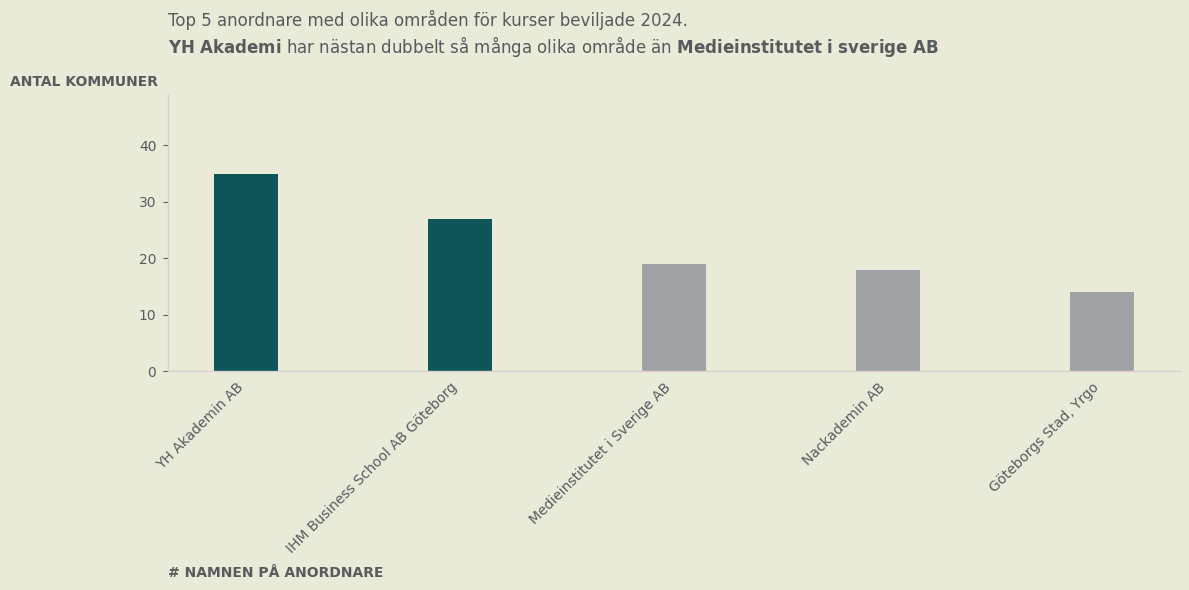

In [129]:
plt.style.use("marcus.mplstyle")


fig, ax = totala_utbildningsområde()

ax.bar(
    anordnare_utbildningsområde.index,
    anordnare_utbildningsområde["Antal utbildningar"],
    color= colors,
    width=0.3
)


# clutter
ax.tick_params("y", pad=5)
ax.tick_params("x", pad=3)

# description title and label -> call to action
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
ax.set_ylabel("ANTAL KOMMUNER", loc="top", rotation=0)
ax.yaxis.set_label_coords(-0.01, 1.02)
ax.set_title(
    "Top 5 anordnare med olika områden för kurser beviljade 2024.\n" 
    r"$\mathbf{YH\ Akademi}$ har nästan dubbelt så många olika område än $\mathbf{Medieinstitutet\ i\ sverige\ AB}$",
    loc="left",
    pad=30,
)
ax.set_xlabel("# NAMNEN PÅ ANORDNARE", loc= "left")

ax.set_facecolor(color="#eaead9")

# adding space
ax.margins(y=0.4)

fig.tight_layout()
save_fig_from_ax(ax, "../figures/top_5_antal_utbilningsområde_anordnare")

Index(['Antal utbildningar'], dtype='object')


# Skapa data för karta

In [105]:
import pandas as pd

df_filter_map = pd.read_csv("../../data/2024_kurser/Ansökande_2020-2024.csv", encoding="latin1")

df_filter_map.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   kön                       294 non-null    object
 1   utbildningsområde MYH     294 non-null    object
 2   region (hemlän)           294 non-null    object
 3   utbildningens studietakt  294 non-null    object
 4   Antal ansökningar 2020    294 non-null    int64 
 5   Antal ansökningar 2021    294 non-null    int64 
 6   Antal ansökningar 2022    294 non-null    int64 
 7   Antal ansökningar 2023    294 non-null    int64 
 8   Antal ansökningar 2024    294 non-null    int64 
 9   Antal sökande 2020        294 non-null    int64 
 10  Antal sökande 2021        294 non-null    int64 
 11  Antal sökande 2022        294 non-null    int64 
 12  Antal sökande 2023        294 non-null    int64 
 13  Antal sökande 2024        294 non-null    int64 
dtypes: int64(10), object(4)
me

In [106]:
df_filter_map.columns

Index(['kön', 'utbildningsområde MYH', 'region (hemlän)',
       'utbildningens studietakt', 'Antal ansökningar 2020',
       'Antal ansökningar 2021', 'Antal ansökningar 2022',
       'Antal ansökningar 2023', 'Antal ansökningar 2024',
       'Antal sökande 2020', 'Antal sökande 2021', 'Antal sökande 2022',
       'Antal sökande 2023', 'Antal sökande 2024'],
      dtype='object')

In [107]:
df_filter_map_2020 = df_filter_map[df_filter_map["kön"] == "totalt"][["utbildningsområde MYH", "region (hemlän)", "Antal ansökningar 2020"]]

df_filter_map_2020

,utbildningsområde MYH,region (hemlän),Antal ansökningar 2020
0,Data/It,Stockholms län,399
1,Data/It,Uppsala län,28
2,Data/It,Södermanlands län,19
3,Data/It,Östergötlands län,13
4,Data/It,Jönköpings län,15
...,...,...,...
289,Transporttjänster,Gävleborgs län,0
290,Transporttjänster,Västernorrlands län,0
291,Transporttjänster,Jämtlands län,0
292,Transporttjänster,Västerbottens län,0


In [108]:
import json

with open("../../data/geojson/swedish_regions.geojson", "r", encoding= "utf-8") as file:
    json_data = json.load(file)
    
    
json_data.get("features")[0].get("properties")
    

{'admin_level': '4',
 'boundary': 'administrative',
 'name': 'Gotlands län',
 'ref:se:län:bokstav': 'I',
 'ref:se:länskod': '09',
 'type': 'multipolygon'}

In [109]:

# List comprehension, loop throw geojsondata regions too get features and in feature get properties where the data for ref:se:länskod is    
propertis = [feature.get("properties") for feature in json_data.get("features")]
region_code = {property.get("name"): property.get("ref:se:länskod") for property in propertis}

region_code

{'Gotlands län': '09',
 'Kalmar län': '08',
 'Blekinge län': '10',
 'Jämtlands län': '23',
 'Västerbottens län': '24',
 'Kronobergs län': '07',
 'Västra Götalands län': '14',
 'Värmlands län': '17',
 'Dalarnas län': '20',
 'Södermanlands län': '04',
 'Jönköpings län': '06',
 'Östergötlands län': '05',
 'Stockholms län': '01',
 'Västmanlands län': '19',
 'Uppsala län': '03',
 'Gävleborgs län': '21',
 'Västernorrlands län': '22',
 'Örebro län': '18',
 'Norrbottens län': '25',
 'Hallands län': '13',
 'Skåne län': '12'}

In [110]:
df_filter_map_2020

,utbildningsområde MYH,region (hemlän),Antal ansökningar 2020
0,Data/It,Stockholms län,399
1,Data/It,Uppsala län,28
2,Data/It,Södermanlands län,19
3,Data/It,Östergötlands län,13
4,Data/It,Jönköpings län,15
...,...,...,...
289,Transporttjänster,Gävleborgs län,0
290,Transporttjänster,Västernorrlands län,0
291,Transporttjänster,Jämtlands län,0
292,Transporttjänster,Västerbottens län,0


In [111]:
# df_filter_map_2020.groupby("län")[["utbildningsområde MYH", "Antal ansökningar 2020"]].sum().reset_index()


# function too filter out which Antal sökningar (year) and utbildningsområde
def filter_data_sokande(df, year =2022, education_area = "Data/It"):
    
    year_column = f"Antal ansökningar {year}"
    df = df.rename({"region (hemlän)": "län"}, axis=1)
    df = df.query(f"`utbildningsområde MYH` == @education_area").reset_index()
    
    
    return df[["län", year_column]]



df_map = filter_data_sokande(df_filter_map, 2022, "Transporttjänster")


In [112]:
from difflib import get_close_matches

df_map["län"].iloc[0]

' Stockholms län'

In [113]:
# test too see how get_close_matches works. its compare first arguments (län in df_map and the firts with .iloc[0]) and second argument key value.
# get_close_matches give a list of comperingsing, [0] take out the first one
region = get_close_matches(df_map["län"].iloc[0], region_code.keys())[0]
region_code[region]

'01'

In [114]:

# append all the code that match with df_map and region_code, using difflib package and function get_glose_matches
# get_close_matches find simile between both arguments. n= 1 is to take out the first one its find 
region_code_map = []
for region in df_map["län"]:
    region_name = get_close_matches(region, region_code.keys(), n=1)[0]
    code = region_code[region_name]
    region_code_map.append(code)
    
region_code_map

['01',
 '03',
 '04',
 '05',
 '06',
 '07',
 '08',
 '09',
 '10',
 '12',
 '13',
 '14',
 '17',
 '18',
 '19',
 '20',
 '21',
 '22',
 '23',
 '24',
 '25']

In [115]:
print(region_code_map)
print(df_map["län"].values)

['01', '03', '04', '05', '06', '07', '08', '09', '10', '12', '13', '14', '17', '18', '19', '20', '21', '22', '23', '24', '25']
[' Stockholms län' ' Uppsala län' ' Södermanlands län'
 ' Östergötlands län' ' Jönköpings län' ' Kronobergs län' ' Kalmar län'
 ' Gotlands län' ' Blekinge län' ' Skåne län' ' Hallands län'
 ' Västra Götalands län' ' Värmlands län' ' Örebro län'
 ' Västmanlands län' ' Dalarnas län' ' Gävleborgs län'
 ' Västernorrlands län' ' Jämtlands län' ' Västerbottens län'
 ' Norrbottens län']


In [116]:
import plotly.graph_objects as go 
import numpy as np 


year_column = "Antal ansökningar 2022"

log_approved = np.log(df_map[year_column] + 1)

fig = go.Figure(
    go.Choroplethmapbox(
        geojson = json_data,
        locations = region_code_map,
        z = log_approved,
        featureidkey="properties.ref:se:länskod",
        colorscale= "blues",
        showscale=False,
        customdata=df_map[year_column],
        text= df_map["län"],
        hovertemplate= "<b>%{text}</b><br>Antal sökande %{customdata}<extra></extra>",
        marker_line_width= 0.3)
    )   

fig.update_layout(
    mapbox= dict(style= "white-bg", zoom= 3.3, center= dict(lat=62.6952, lon= 13.9149)),
    width= 470,
    height= 500,
    margin= dict(r=0 , l=0 , t=50 , b=0),
    title= dict(
        text= "text",
        x= 0.06,
        y= 0.75,
        font= dict(size=13)
    )
)


fig.show()

C:\Users\Marcus\AppData\Local\Temp\ipykernel_28668\792278916.py:10: DeprecationWarning: *choroplethmapbox* is deprecated! Use *choroplethmap* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/
  go.Choroplethmapbox(
